<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [26]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

#boston_df.head()

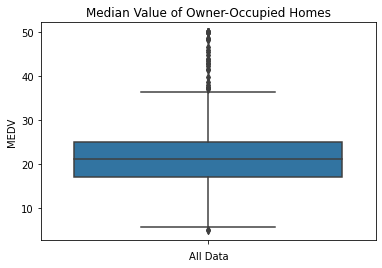

In [27]:
# For the "Median value of owner-occupied homes" provide a boxplot
# MEDV - Median value of owner-occupied homes in $1000’s

# Create a boxplot
ax = sns.boxplot(y="MEDV", data=boston_df)
pyplot.title('Median Value of Owner-Occupied Homes')
pyplot.xlabel('All Data')
pyplot.show()

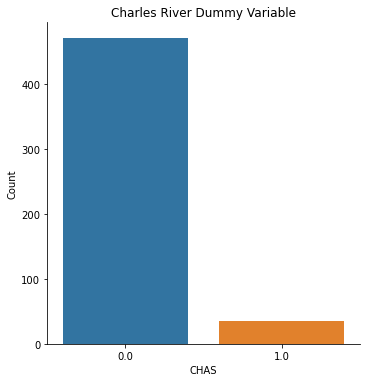

In [28]:
# Provide a bar plot for the Charles river variable
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

# Create a barplot
ax = sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.title('Charles River Dummy Variable')
pyplot.xlabel('CHAS')
pyplot.ylabel('Count')
pyplot.show()

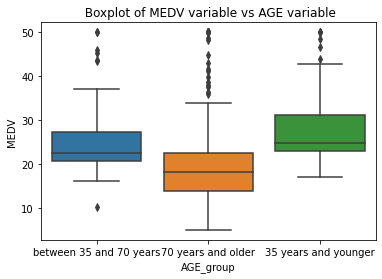

In [29]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
 
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_group'] = '70 years and older'

# Create a boxplot
ax = sns.boxplot(x="AGE_group", y="MEDV", data=boston_df)
pyplot.title(' Boxplot of MEDV variable vs AGE variable')
pyplot.show();

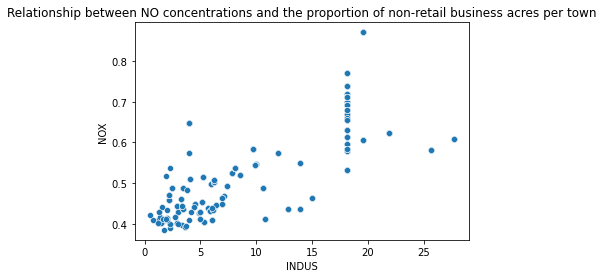

In [30]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. - What can you say about the relationship? -

#- NOX - nitric oxides concentration (parts per 10 million)
#- INDUS - proportion of non-retail business acres per town.

# Create a scatterplot
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Relationship between NO concentrations and the proportion of non-retail business acres per town')
pyplot.show();

**Conclusion:** There is a clear positive correlation between nitric oxides concentration and proportion of non-retail business acres per town

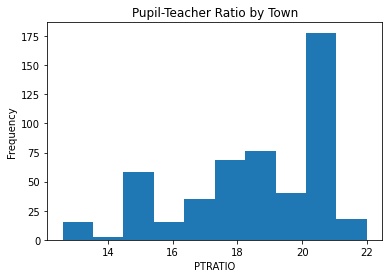

In [31]:
# Create a histogram for the pupil to teacher ratio variable
# PTRATIO - pupil-teacher ratio by town

# Create a hystogram
pyplot.hist(boston_df['PTRATIO'])
pyplot.title('Pupil-Teacher Ratio by Town')
pyplot.xlabel('PTRATIO')
pyplot.ylabel('Frequency')
pyplot.show()

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis
* $H_0: µ_1 = µ_2$ (There is no difference in median value of houses bounded by the Charles river)
* $H_1: µ_1 ≠ µ_2$ (There is a difference in median value of houses bounded by the Charles river)

Significance threshold level
* $Alpha (α) = 0.05$

In [32]:
# Calculate t-test statistics
statistic, p_value = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                                           boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

print(f"t-test statistic for independent samples: {statistic}, p-value: {p_value}")

t-test statistic for independent samples: 3.996437466090509, p-value: 7.390623170519905e-05


**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA test)

Hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ (The three means are equal)
* $H_1:$ At least one of the means differ

Significance threshold level
* $Alpha (α) = 0.05$

In [33]:
# Create the 3 groups for ANOVA analysis
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_group'] = '70 years and older'

# Separate the three age groups into a variable each
thirtyfive_lower = boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']

# Calculate one-way ANOVA statistics
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F-Statistic: {0}, p-Value: {1}".format(f_statistic, p_value))

F-Statistic: 36.40764999196599, p-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis
* $H_0:$ Nitric oxide concentration is not correlated with proportion of non-retail business acres per town
* $H_1:$ Nitric oxide concentration is correlated with proportion of non-retail business acres per town


Significance threshold level
* $Alpha (α) = 0.05$

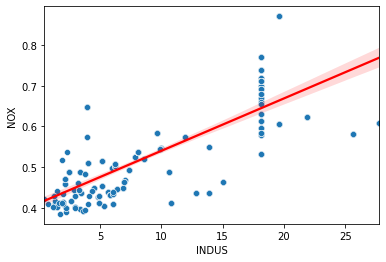

Pearson r: 0.7636514469209151, P-Value: 7.913361061239527e-98


In [34]:
# Create a scatterplot
ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)

# Add the regression line
sns.regplot(x="INDUS", y="NOX", data=boston_df, scatter=False, color='red')
pyplot.show()

# Calculate Pearson's r statistics
pearson_r, p_value = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print("Pearson r: {0}, P-Value: {1}".format(pearson_r, p_value))

**Conclusion:** Since the p-value is less than < 0.05, we reject  the null hypothesis and conclude that there  exists a relationship between oxide concentration and the proportion of non-retail business acres per town.

### What is the impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value of owner occupied homes (MEDV)? (Regression analysis)

- DIS (weighted distances to five Boston employment centres) is the independent variable
- MEDV (Median value of owner-occupied homes in $1000’s) is the dependent variable

In [35]:
# x is the independent variable
x = boston_df['DIS']

# y is the dependent variable
y = boston_df['MEDV']

# Add an intercept b0
x = sm.add_constant(x) 

# Ordinary Least Square regression
model = sm.OLS(y, x).fit()

# Get the regression coefficients
b0 = model.params[0]
b1 = model.params[1]

# Print the regression line
print("Regression line: y = {:.3f} + {:.3f}x1".format(b0, b1))

# Make predictions using the fitted model
predictions = model.predict(x)

# Print the statistics
model.summary()

Regression line: y = 18.390 + 1.092x1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        17:32:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The coefficient of 1.092 for the DIS variable indicates that for each additional unit increase in the weighted distance to the five Boston employment centres (DIS), the median value of owner-occupied homes (MEDV) is expected to increase by 1092 dollars.